### House Price (linear regression)
#### Problem statement
Using the set of some basic attributes that are related to the price of the house, predict the sale price for a new house using Linear Regression.

Let’s get started to make a prediction with a rich dataset on housing prices from Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this concept, we'll build models that predict the final sale price of a house based on its other attributes. The original data set contains 82 features and 2930 data points.You can read more about this dataset here.

* ExterQual (Ordinal): Evaluates the quality of the material on the exterior
(5: Excellent, 4: Good, 3: Average/Typical, 2: Fair, 1: Poor)

* AllFlrsSF(Continuous): Total square feet for 1st and 2nd floor combined
* GrLivArea (Continuous): Above grade (ground) living area square feet
* SimplOverallCond (Ordinal): Rates the overall condition of the house
(1: Bad, 2: Average, 3: Good)

* Garage Area (Continuous): Size of garage in square feet
* TotRmsAbvGrd (Nominal): Total rooms above grade (does not include bathrooms)
* LotFrontage (Continuous): Linear feet of street connected to property
* price

In [11]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [45]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

In [3]:
# read data
train = pd.read_csv("ames_train.csv")
test = pd.read_csv("ames_test.csv")

In [13]:
print(train.shape)
train.head()

(1092, 8)


,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,4,1316,1316,2,397,6,65.0,169990
1,4,2028,2028,2,880,7,88.0,369900
2,3,1072,1072,2,525,5,35.0,140000
3,3,1048,1048,2,286,6,72.0,135000
4,3,1779,1779,2,546,6,80.0,197900


In [14]:
print(test.shape)
test.head()

(292, 8)


,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,3,1839,1839,3,416,7,110.0,257500
1,3,2126,2126,2,538,7,0.0,185000
2,4,1709,1709,2,380,7,24.0,130000
3,3,1902,1902,2,539,8,68.0,112000
4,3,1072,1072,2,525,5,35.0,148000


In [7]:
# split into features and target
X_train = train.drop(['SalePrice'], axis = 1)
y_train = train['SalePrice']

In [8]:
X_test = test.drop(['SalePrice'], axis = 1)
y_test = test['SalePrice']

In [10]:
# display first five rows of training features and target
X_train.head()
# print(y_train.head())
# print(X_test.head())
# print(y_test.head())

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage
0,4,1316,1316,2,397,6,65.0
1,4,2028,2028,2,880,7,88.0
2,3,1072,1072,2,525,5,35.0
3,3,1048,1048,2,286,6,72.0
4,3,1779,1779,2,546,6,80.0


In [33]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x)- n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()


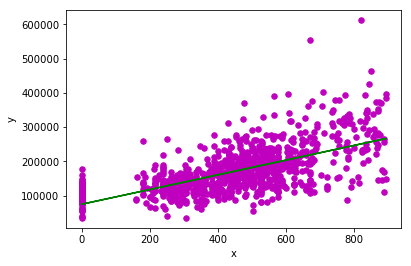

In [34]:
# Visualize your results
values = estimate_coef(X_train['GarageArea'], y_train)
plot_regression_line(X_train['GarageArea'], y_train, values)

In [36]:
# Predict `SalePrice` with scikit-learn

# instantiate linear model
lin_reg = LinearRegression()

# fit model on training data
lin_reg.fit(X_train,np.log(y_train))
# predict on test features
y_pred = lin_reg.predict(X_test)

# display prediction
print(y_pred)

[12.11227082 12.19875709 12.17873549 12.09451926 11.79496421 11.62810742
 12.23094302 11.66779875 12.83933008 11.42802489 13.03969447 11.48996121
 11.96267792 12.15572954 11.84253379 11.80049608 11.63719563 11.95712008
 12.33129216 12.18239258 12.02229166 12.0255932  12.23719561 11.87200608
 12.44798664 12.643851   12.47162239 12.5982682  11.8215798  11.50148537
 11.789251   13.22072258 11.50903908 11.87175444 12.20648447 12.23039239
 11.69069064 12.89000353 11.7661653  12.30551334 12.29771967 11.68183125
 12.84865739 11.97590572 12.48417858 12.05078167 11.76415223 11.68701845
 12.25244997 12.23563131 11.51096238 12.6868023  11.79805816 11.80839364
 12.05803133 12.79445006 12.15644059 12.02083321 11.5972928  12.61133737
 12.17873549 12.98542578 12.19936653 11.39135943 11.90586361 11.8061422
 11.79982215 11.72513481 11.82121504 11.56637513 11.81933974 12.42686173
 11.68135512 11.73767058 11.78233782 12.74326629 12.23338334 11.7939831
 12.11819825 12.03048394 11.68266492 12.12712056 11.9

In [38]:
# MAE calculation
mae = mean_absolute_error(y_test, np.exp(y_pred))
print(mae)

29158.29503663651


In [44]:
# RMSE colculation
rmse = math.sqrt(mean_squared_error(y_test, np.exp(y_pred)))
print(rmse)

42842.868891224905


In [46]:
# R-squared calculation
rsquared = r2_score(y_test, np.exp(y_pred))
print(rsquared)

0.7378446924962252


#### After completing this project, got a better understanding of how to build a linear regression model. And applied following concepts.

* Train-test split
* Correlation between the features
* Linear Regression
* MSE and R^2 Evaluation Metrics